
**Data Science Challenge: Card Transactions!**



In the following cell we import all the python packages we are going to need for our analysis. 
It is better to have them organized in the first cell.

**Requirements**

In [813]:
# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd

from datetime import datetime

# =====================================
# scikit-learn and imbalanced-learn

# Preprocessing etc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Classifiers



# Evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# =====================================
# Matplotlib, seaborn etc 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

# Define Capital One colors 
cap1_blue ='#004879'
cap1_red = '#D22E1E'
# ======================================

# Question: Load
**Load and simple preprocessing**

In the first part we load the data and perform some basic data preprocessing.

## Load the dataset

In [859]:
# Load the file, which is line-delimited JSON format 
# Convert it into a pandas dataframe
trans_df = pd.read_json('transactions.txt', lines=True)
# Some of the missing values are in form of "" delimeters, replace with nan
trans_df.replace('', np.nan, inplace=True)

# Let us check the first few values
trans_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


**Let's get the names of the columns**

In [10]:
trans_df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

**Get some general information about non-null count and data type**

In [29]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

**Drop columns that have only null values**

In [860]:
trans_df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'], axis=1, inplace=True)

In [ ]:
print(trans_df)

## Description of the structure of the data

The dataset consists of 786363 entries (number of records) and a total number of 28 fields for each record. We found above that 6 fields are totally empty, so we drop them.
Finally, we have 786363 entries and 22 non-null fields.

## Description and summary statistics for the fields in the dataset

We can apply the `describe()` pandas method to our dataset.

In [131]:
trans_df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


So, let us try to describe each one of the fields in the dataset with the appropriate metrics.

Let us check one-by-one some of the most important columns/fields.
**If you want a quick reference of the statistics of the dataset, you can skip the detailed analysis below and check directly the "quick summary statistics for reference" section.**

- `accountNumber`: This field contains the account numbers for each transaction.  Let us check for NaN values and number of entries (unique accounts).

In [133]:
print('Null values, accountNumber:',trans_df['accountNumber'].isna().sum())

Null values, accountNumber: 0


Great, we have zero null values. Let us check for unique values.

In [142]:
print('Unique values, accountNumber:',trans_df['accountNumber'].nunique())

Unique values, accountNumber: 5000


We have 5000 different account numbers in our dataset. I am curious if some of them dominate the transaction numbers in the dataset. For that reason, let's plot the frequency (make a histogram) of unique account numbers. 

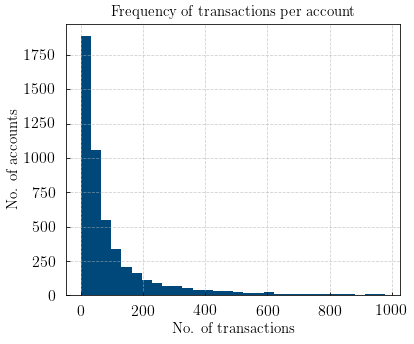

In [520]:
Unique_acNumbers = trans_df['accountNumber'].value_counts(normalize=False).values

# Make a plot 
plt.figure(figsize=(6,5))

plt.hist(Unique_acNumbers[Unique_acNumbers<1000],color=cap1_blue, bins=30)
plt.grid(ls='--',alpha=0.6)
plt.title('Frequency of transactions per account',fontsize=15)
plt.xticks(fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('No. of transactions', fontsize=15);plt.ylabel('No. of accounts', fontsize=15)
plt.show()

We see that the the majority of accounts have a small number of transactions ($<100$), with a small number of accounts having many transactions ($>1000$). It is something that is good to have in mind in future investigations.

- `customerId`

This field seems to be the same as acount number. Let's confirm that.

In [775]:
print((trans_df['accountNumber'] - trans_df['customerId']).sum())

0


- `transactionDateTime`

Let's convert this column to datetime, for future ease

In [250]:
trans_df['transactionDateTime'] = pd.to_datetime(trans_df['transactionDateTime'],infer_datetime_format=True)

### Quick summary statistics for reference.

**Number of unique values at each column, min and max value**

Note that the min and max values are not very meaningful for some columns

In [249]:
trans_df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  3
currentBalance              487318
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

In [770]:
print(trans_df.min())

accountNumber                         100088067
customerId                            100088067
creditLimit                                 250
availableMoney                         -1005.63
transactionDateTime         2016-01-01 00:01:02
transactionAmount                          0.00
merchantName                            1st BBQ
merchantCategoryCode                    airline
currentExpDate                          01/2020
accountOpenDate                      1989-08-22
dateOfLastAddressChange              1989-08-22
cardCVV                                     100
enteredCVV                                    0
cardLast4Digits                               0
currentBalance                             0.00
cardPresent                               False
expirationDateKeyInMatch                  False
isFraud                                   False
dtype: object


In [771]:
print(trans_df.max())

accountNumber                         999389635
customerId                            999389635
creditLimit                               50000
availableMoney                         50000.00
transactionDateTime         2016-12-30 23:59:45
transactionAmount                       2011.54
merchantName                 williamssonoma.com
merchantCategoryCode              subscriptions
currentExpDate                          12/2032
accountOpenDate                      2015-12-31
dateOfLastAddressChange              2016-12-30
cardCVV                                     998
enteredCVV                                  998
cardLast4Digits                            9998
currentBalance                         47498.81
cardPresent                                True
expirationDateKeyInMatch                   True
isFraud                                    True
dtype: object


# Question: Plot

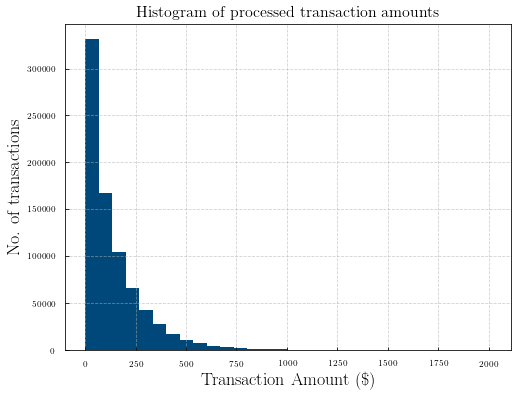

In [496]:
prossAmount = trans_df['transactionAmount'].values


plt.figure(figsize=(8,6))
plt.hist(prossAmount, color=cap1_blue, bins=30)
plt.grid(ls='--',alpha=0.6)
plt.title("Histogram of processed transaction amounts", fontsize=16)
plt.xlabel(r'Transaction Amount $(\$)$',fontsize=18);plt.ylabel('No. of transactions', fontsize=18)
plt.show()

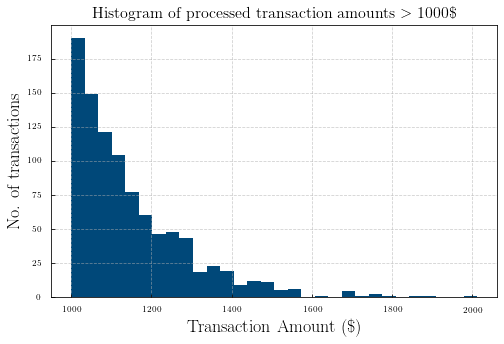

In [92]:
plt.figure(figsize=(8,5))
plt.hist(prossAmount[prossAmount>1000], color=cap1_blue, bins=30)
plt.grid(ls='--',alpha=0.6)
plt.title("Histogram of processed transaction amounts $> 1000\$ $", fontsize=16)
plt.xlabel(r'Transaction Amount $(\$)$',fontsize=18);plt.ylabel('No. of transactions', fontsize=18)
plt.show()

# Question: Data Wrangling - Duplicate Transactions

In this part we will investigate duplicate transactions that are present in the dataset. Specifically we are interested in **reversed transactions** (when a purchase is followed by a reversal) and **multi-swipe** (accidentally charging a card multiple times).  

I spent a lot of time visually investigating the dataset, trying to get a sense of when reversed and multi-swipe transactions occur (and how they are encoded in the dataset). Here are some of my findings:


- First of all, there exist duplicates that do not seem to correspond to any of the above categories. For example one of the first duplicate transactions are two purchases on Play Store ($7.47\$$ each), that do not correspond to a reversed transaction (both have a `PURCHASE` label in the `transactionType` column), neither multi-swipe (happened with a difference of over a year).

- Some times between the PURCHASE and the REVRSAL other transactions have happened. Not all reversed transactions correspond to two subsequent rows in the dataset. 

- Although all the REVERSALS that I have inspected seem to have a corresponding PURCHASE (same transaction amount, same merchant name, same account number), I am not sure that all REVERSALS correspond to reversed purchases as defined here. For example, some may correspond to a smaller amount, due to errorneous initial amount in purchase, etc. In other words, we cannot be absolutely sure that selecting the transactions with a transaction type of `REVERSAL` will give us only reversed purchases.

- For multi-swipes: from my investigation, these are duplicate transactions that follow each other (subsequent rows) and within a short period of time (e.g. < 60 seconds).

So, here I will follow the follow **strategy** to define and **find** reversed and multi-swipe transactions:

- For **reversed transaction**: Find duplicates (two `transactionAmount` entries being the same), where the first one of them has a `transactionType` of PURCHASE and the second REVERSAL, by the same `accountNumber`, same credit card (as indicated by `cardLast4Digits`) and same `merchantName`. For simplicity, check duplicates that conform to those criteria and are separated by max 100 rows. (That's to simplify and make faster the computation). 

- Compare the results of the above method with those we get assuming that all transactions with a `REVERSAL` correspond to reversed purchases. 

- For **multi-swipe** transactions: Find duplicates (same `transactionAmount`entries being the), that both of them have a `transactionType` of PURCHASE and the time difference between them is small, let's say $<60$ seconds (although we can check how the results depend on the exact number).

### Reversed Transactions

Let's find the reversed transactions (total number and total amount) according to the above definition.

In [651]:
trans_type = trans_df['transactionType'] # Transaction type, we will need it
merch_name = trans_df['merchantName'] # Merchant name, we will need it

rev_amount = [] #Initialize a list that keeps the transaction amounts
rev_Fraud = [] # Initialize a list that keeps the Fraud/no Fraud labels

for i in range(1,100):
    # Difference between transaction amount
    diff_am_i = trans_df['transactionAmount'].diff(periods=i)
    # Difference in credit card numbers
    diff_card_i = trans_df['cardLast4Digits'].diff(periods=i)
    
    # Are the merchant names the same?
    merch_same = merch_name.eq(merch_name.shift(periods=i))
    
    
    # Define criteria for reversed
    crit_reversed = (diff_card_i==0)&(diff_am_i==0)&(trans_type=='REVERSAL')&(merch_same==True)
    reversed_trans = trans_df['transactionAmount'][crit_reversed]
    reversed_isFraud = trans_df['isFraud'][crit_reversed]
    
    # Append the lists
    rev_amount += list(reversed_trans.values)
    rev_Fraud += list(reversed_isFraud.values)  

In [652]:
print('Number of reversed transactions:',len(rev_amount))
print('Total transaction amount (in million dollars):',sum(rev_amount)/1e6)

Number of reversed transactions: 15604
Total transaction amount (in million dollars): 2.258749409999998


**Results**: We have about 15600 reversed transactions, amounting a total of $\sim 2.25$ million $\$$.

In [653]:
#reverals = trans_df['transactionAmount']
trans_reversals = trans_df[trans_df['transactionType']=='REVERSAL']['transactionAmount']
trans_revers_fraud = trans_df[trans_df['transactionType']=='REVERSAL']['isFraud']

### Multi-Swipe

Let's find now the multi-swipe transactions, according to the strategy mentioned above. I will also make the simplifying assumption that all of them are only happen two times in a row. 


**Update** Initially we said that we would sent the time difference to be $<60$ seconds. However 

In [667]:
swipe_amount = [] #Initialize a list that keeps the transaction amounts
swipe_Fraud = [] # Initialize a list that keeps the Fraud/no Fraud labels

for i in range(1,5):
    # Get differences between transaction amounts, only subsequent rows
    diff_amount = trans_df['transactionAmount'].diff(periods=i)
    # Get differences between credit card numbers, only subsequent rows
    diff_card = trans_df['cardLast4Digits'].diff(periods=i)
    # Are the merchant names the same?
    merch_same = merch_name.eq(merch_name.shift(periods=i))
    # Get differences between transaction date/time, only subsequent rows
    difftime = trans_df['transactionDateTime'].diff(periods=i)
    # Convert to seconds
    diff_seconds = difftime.dt.total_seconds().values


    # get the transactions that pass the multi-swipe criteria as stated earlier
    criteria = (diff_card==0)&(diff_amount==0)&(trans_type!='REVERSAL')&(merch_same==True)&(diff_seconds<200)
    mult_sw_trans = trans_df['transactionAmount'][criteria]
    mult_sw_Fraud = trans_df['isFraud'][criteria]
    
    # Append the lists
    swipe_amount += list(mult_sw_trans.values)
    swipe_Fraud += list(mult_sw_Fraud.values)  

Convert lists to arrays

In [688]:
rev_amount = np.asarray(rev_amount)
rev_Fraud = np.asarray(rev_Fraud)
swipe_amount = np.asarray(swipe_amount)
swipe_Fraud = np.asarray(swipe_Fraud)

In [668]:
print('Number of multi-swipe transactions:',len(swipe_amount))
print('Total transaction amount (in million dollars):',sum(swipe_amount)/1e6)

Number of multi-swipe transactions: 8142
Total transaction amount (in million dollars): 1.174953989999993


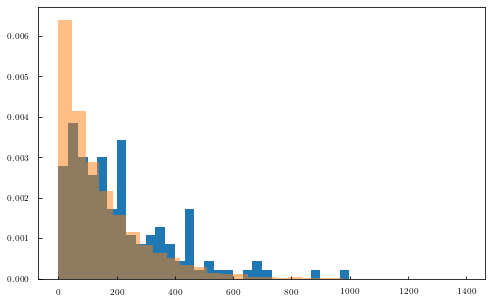

In [692]:
plt.figure(figsize=(8,5))

plt.hist(swipe_amount[swipe_Fraud==True], bins=30,density=True)
plt.hist(swipe_amount[swipe_Fraud==False], bins=30,density=True,alpha=0.5)


plt.show()

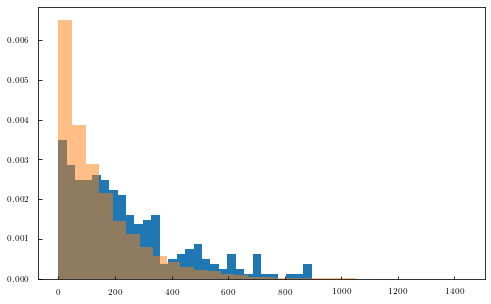

In [693]:
plt.figure(figsize=(8,5))

plt.hist(rev_amount[rev_Fraud==True], bins=30,density=True)
plt.hist(rev_amount[rev_Fraud==False], bins=30,density=True,alpha=0.5)


plt.show()

**Plot proportions**

In [724]:
tot_amount = trans_df['transactionAmount'].values
tot_Fraud =  trans_df['isFraud'].values

In [735]:
n_thresh = 100
thresh = np.linspace(10,600,n_thresh)
props_rev = np.zeros(n_thresh)
props_swipe = np.zeros(n_thresh)
props_tot = np.zeros(n_thresh)


for i in range(n_thresh):
    thres = thresh[i]
    props_rev[i] = len(rev_amount[(rev_Fraud==True)&(rev_amount>thres)])/len(rev_amount[(rev_amount>thres)])
    props_swipe[i] = len(swipe_amount[(swipe_Fraud==True)&(swipe_amount>thres)])/len(swipe_amount[(swipe_amount>thres)])
    props_tot[i] =  len(tot_amount[(tot_Fraud==True)&(tot_amount>thres)])/len(tot_amount[(tot_amount>thres)])

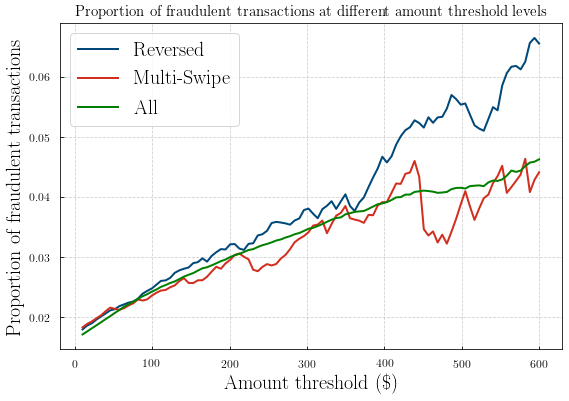

In [763]:
plt.figure(figsize=(9,6))


plt.plot(thresh,props_rev,c=cap1_blue,linewidth=2,label='Reversed')
plt.plot(thresh,props_swipe,c=cap1_red,linewidth=2, label='Multi-Swipe')
plt.plot(thresh,props_tot,c='green',linewidth=2, label='All')
plt.grid(ls='--',alpha=0.6)
plt.title('Proportion of fraudulent transactions at different amount threshold levels', fontsize=15)

plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.xlabel('Amount threshold ($\$$)', fontsize=20)
plt.ylabel('Proportion of fraudulent transactions', fontsize=20)
plt.legend(frameon=True, loc='upper left', fontsize=20)
plt.show()

# Question: Model

Fraudulent credit card transactions is a serious problem in banking. In this part we will develop a predictive model for fraudulent transactions. Namely, we will use the data we have to train a **classifier** able to distinguish between a fraudulent and non-fraudulent transactions. 

## Target classes

Before start thinking about how to create this predictive model, let us inspect the number of examples in the target classes.  Below we calcuate the number and create a bar plot of the fraudulent and clean transactions.

In [821]:
# Get the target value classes (Fraud/Not Fraud)
# Convert the Boolean array (True/False) into integers (0/1) that
# A classifier can uderstand
y_target = trans_df['isFraud'].values.astype(int)

# Let's print and then plot the number of Fraudulent and non-Fraudulent transactions
n_Fraud = len(y_target[y_target==1])
n_nonFraud = len(y_target[y_target==0])

print('No. of fraudulent transactions:', n_Fraud)
print('No. of non-fraudulent transactions:', n_nonFraud)

No. of fraudulent transactions: 12417
No. of non-fraudulent transactions: 773946


Let's make a plot, to see that better

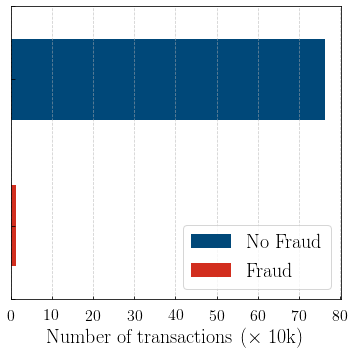

In [819]:
fig = plt.figure(figsize=(5.,5.))
plt.barh(4, n_nonFraud/10000, height=1.1, color=cap1_blue, label='No Fraud')
plt.barh(2, n_Fraud/10000, height=1.1, color=cap1_red, label='Fraud')
plt.grid(ls='--', axis='x', alpha=0.6)

plt.xticks(fontsize=16)
plt.yticks([1,2,4,5],(),fontsize=10)
plt.legend(frameon=True, loc='lower right', fontsize=20)
plt.xlabel(r'Number of transactions ($\times$ 10k)', fontsize=20)
plt.tight_layout()
plt.show()

We see that the target classes are **heavily imbalanced**, in other words we have many more non-fraudulent transactions ($\sim 774$k) than fraudulent ones ($\sim 12$k). This is expected if the dataset represents real world data.

So, when building our predictive model we should appropriately take this class imbalance into account.


## Simplifying assumptions for a baseline model

Here, I will make a few (interconnected) simplifying assumptions to make modeling easier.

- Assumption one: We will not use any **time information**. For example, one can imagine that the number of previous transactions, and even more importantly the number of previous fraudulent transactions by a specific credit number can be a strong predictor for future fraudulent behavior. However this requires a careful treatment of the way we split the dataset into training-validation-test sets, in order not to have leaking information between them, and blending forecasting with binary prediction models. We will drop it for now.

- Some acount numbers/credit cards or merchants may have a higher number of fraudulent transactions. But this require some splitting of data based on time, that we will avoid in our baseline feature selection.

Having made this assumptions, let us start the dataset preprocessing.

## Dataset Preprocessing

Let's discuss and perform some data preprocessing steps here.

### Columns to drop

Based on the assumptions above, I will drop the following columns:

- `accountNumber`,`customerId`,`transactionDateTime`
- `merchantName`,`currentExpDate`, `accountOpenDate`
- `dateOfLastAddressChange`, `cardCVV`, `enteredCVV`,`cardLast4Digits`

Let's also drop the `isFraud` label column, since we have already kept the labels above. 

We drop the `cardCVV` and `enteredCVV` columns, we expect however that the fact these two are the same or not may provide significant information about an attempted fraudulent transaction.

Thus, before droping them, I will create a boolean array that is true if the two are the same and false otherwise.

Furthermore, we have two columns, `acqCountry` code, and `merchantCountryCode`. We will also substitute them with a new feature that just shows if the two countries match.


**Note:** Although it consumes memory, I find it to be a good practice to store to create a new dataframe every time I make a significant preprocessing change. That way it prevents accidental errors when, for example, running the same cell twice etc. I'll give them letter names, like df_a, df_b, etc

In [870]:
# Find if the CVVs match
matching_CVV = ~(trans_df.enteredCVV - trans_df.cardCVV).astype(bool)
# Convert to a dataframe
matching_CVV_df = pd.DataFrame({'matchCVV':matching_CVV})

# ==================================================================
# Boolean array - do the two countries match?
matching_countries = trans_df.acqCountry == trans_df.merchantCountryCode
# Convert to a dataframe
matching_countries_df = pd.DataFrame({'matchCountries':matching_countries})

In [871]:
# Make a list of the columns I am going to drop 
cols_to_drop = ['accountNumber','customerId','transactionDateTime',
               'merchantName','currentExpDate', 'accountOpenDate',
               'dateOfLastAddressChange', 'cardCVV', 'enteredCVV',
               'cardLast4Digits','acqCountry','merchantCountryCode',
               'isFraud']

# Drop columns from the dataframe 
a_df = trans_df.drop(cols_to_drop, axis=1)

# Concatenate the dataframes
b_df = pd.concat([a_df,matching_CVV_df,matching_countries_df], axis=1)

In [872]:
b_df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,matchCVV,matchCountries
0,5000,5000.0,98.55,02,01,rideshare,PURCHASE,0.0,False,False,True,True
1,5000,5000.0,74.51,09,01,entertainment,PURCHASE,0.0,True,False,True,True
2,5000,5000.0,7.47,09,01,mobileapps,PURCHASE,0.0,False,False,True,True
3,5000,5000.0,7.47,09,01,mobileapps,PURCHASE,0.0,False,False,True,True
4,5000,5000.0,71.18,02,01,fastfood,PURCHASE,0.0,True,False,True,True


In [869]:
print(len(lol[lol==False]))

4632
